<a href="https://colab.research.google.com/github/Jana-ekram/AI-Project/blob/main/Copy_of_AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Importing the data set from Kaggle**

In [2]:
import pandas as pd
import numpy as np

from scipy.stats import entropy
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler

url = "https://raw.githubusercontent.com/JjMyDamnSon/AI_sub/refs/heads/main/ecommerce_customer_data_custom_ratios.csv"
data = pd.read_csv(url)

data.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


## **Data Preprocessing**

In [3]:
#sort Purchase Date attribute ascendingly


data['Purchase Date'] = pd.to_datetime(data['Purchase Date'], errors='coerce')
data = data.sort_values(by='Purchase Date', ascending=True)

data.head()




,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
78366,25337,2020-01-01 00:15:00,Home,32,2,2525,Cash,42,0.0,Justin Sanchez,42,Female,0
249751,32242,2020-01-01 00:15:15,Home,161,5,2788,PayPal,60,1.0,Rebecca Mcdaniel,60,Female,1
201096,14853,2020-01-01 00:22:42,Books,93,2,690,PayPal,53,0.0,Pamela Mcdowell,53,Male,0
45577,32581,2020-01-01 00:31:11,Clothing,375,1,2368,PayPal,21,NaN,Janice Oconnor,21,Female,1
1460,16006,2020-01-01 00:34:38,Electronics,125,1,1649,Credit Card,37,1.0,Brian Williams,37,Female,0


**Categorizing Total Purchase Amount Attribute**

In [4]:
#convert Total Purchase Amount into categorical ranges based on quantiles

Q1 = data['Total Purchase Amount'].quantile(0.25)
Q2 = data['Total Purchase Amount'].quantile(0.50)
Q3 = data['Total Purchase Amount'].quantile(0.75)
min_value = data['Total Purchase Amount'].min()
max_value = data['Total Purchase Amount'].max()

def categorize_purchase_amount(amount):
    if amount <= Q1:
        return 'low value'
    elif amount <= Q2:
        return 'medium value'
    elif amount <= Q3:
        return 'high value'
    else:
        return 'very high value'

data['Purchase Amount Category'] = data['Total Purchase Amount'].apply(categorize_purchase_amount)

category_mapping = {
    'low value': 0,
    'medium value': 1,
    'high value': 2,
    'very high value': 3
}
data['Normalized Purchase Amount'] = data['Purchase Amount Category'].map(category_mapping)




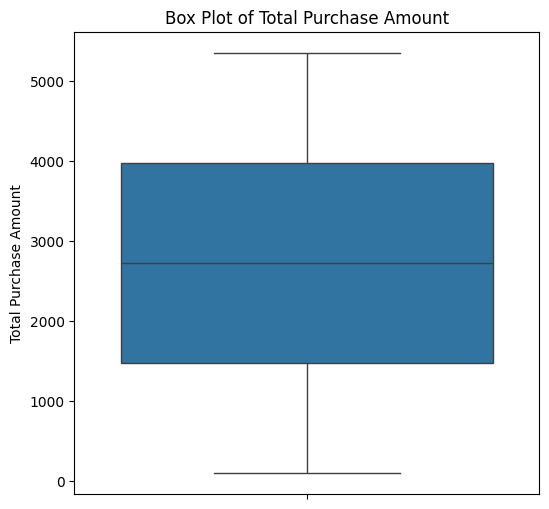

In [5]:
# Single box plot for Total Purchase Amount
plt.figure(figsize=(6, 6))
sns.boxplot(y='Total Purchase Amount', data=data)
plt.title("Box Plot of Total Purchase Amount")
plt.ylabel("Total Purchase Amount")
plt.show()


 **Replace Missing Values**

In [6]:
def check_data_cleanliness(data):
    #check for missing values
    if data.isnull().values.any():
        print("Data contains missing values.\n")
        print("Summary of missing values per column:")
        print(data.isnull().sum())
    else:
        print("No missing values found in the data.")

    #check for duplicate rows
    duplicates = data.duplicated().sum()
    if duplicates > 0:
        print(f"\nData contains {duplicates} duplicate rows.")
    else:
        print("\nNo duplicate rows found.")
    print("\nData types of each column:")
    print(data.dtypes)


#replace missing values in the Returns column with the mean value
data['Returns'] = data['Returns'].fillna(data['Returns'].mean())

print(data['Returns'].isnull().sum())
print("\nUpdated Data Preview:")
data.head()

check_data_cleanliness(data)


0

Updated Data Preview:
No missing values found in the data.

No duplicate rows found.

Data types of each column:
Customer ID                            int64
Purchase Date                 datetime64[ns]
Product Category                      object
Product Price                          int64
Quantity                               int64
Total Purchase Amount                  int64
Payment Method                        object
Customer Age                           int64
Returns                              float64
Customer Name                         object
Age                                    int64
Gender                                object
Churn                                  int64
Purchase Amount Category              object
Normalized Purchase Amount             int64
dtype: object


In [7]:
import numpy as np

from scipy.stats import entropy
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler




# Define relevant attributes
relevant_attributes = ['Product Category',
                      'Total Purchase Amount',
                      'Customer Age', 'Returns', 'Gender']

# Summary statistics for numerical attributes
numerical_attributes = [ 'Total Purchase Amount', 'Customer Age', 'Returns']

# Calculate mean, median, mode, and standard deviation for numerical attributes
means = data[numerical_attributes].mean()
medians = data[numerical_attributes].median()
std_dev = data[numerical_attributes].std()

# Display the statistics
print("\nMeans:\n", means)
print("\nMedians:\n", medians)
print("\nStandard Deviation for Numerical Attributes:\n", std_dev)

# Calculate mode for all relevant attributes, including categorical ones
modes = {}
for column in relevant_attributes:
    modes[column] = data[column].mode().iloc[0]  # Get the first mode for all attributes

print("\nModes for All Attributes:")
for key, value in modes.items():
    print(f"{key}: {value}")



Means:
 Total Purchase Amount    2725.370732
Customer Age               43.940528
Returns                     0.497861
dtype: float64

Medians:
 Total Purchase Amount    2724.000000
Customer Age               44.000000
Returns                     0.497861
dtype: float64

Standard Deviation for Numerical Attributes:
 Total Purchase Amount    1442.933565
Customer Age               15.350246
Returns                     0.449890
dtype: float64

Modes for All Attributes:
Product Category: Clothing
Total Purchase Amount: 2786
Customer Age: 58
Returns: 0.0
Gender: Female


**Calculate Entropy**

In [8]:
#calculate entropy for all relevant columns (excluding Purchase Date)
def calculate_entropy(column):
    if column.dtype == 'object' or column.nunique() < 10:  # Categorical
        distribution = column.value_counts(normalize=True)
        return entropy(distribution)
    elif np.issubdtype(column.dtype, np.number):  # Numerical, bin into categories
        bins = np.histogram_bin_edges(column, bins='auto')
        binned_counts = np.histogram(column, bins=bins)[0]
        distribution = binned_counts / binned_counts.sum()
        return entropy(distribution)


entropies = {col: calculate_entropy(data[col]) for col in relevant_attributes}
print("\nEntropy Values for All Relevant Attributes:")
for key, value in entropies.items():
    print(f"{key}: {value}")


Entropy Values for All Relevant Attributes:
Product Category: 1.3662146996291606
Total Purchase Amount: 4.18135105788009
Customer Age: 3.9697238822818317
Returns: 1.047954926979278
Gender: 0.6931371453263766


 **Visualizations**

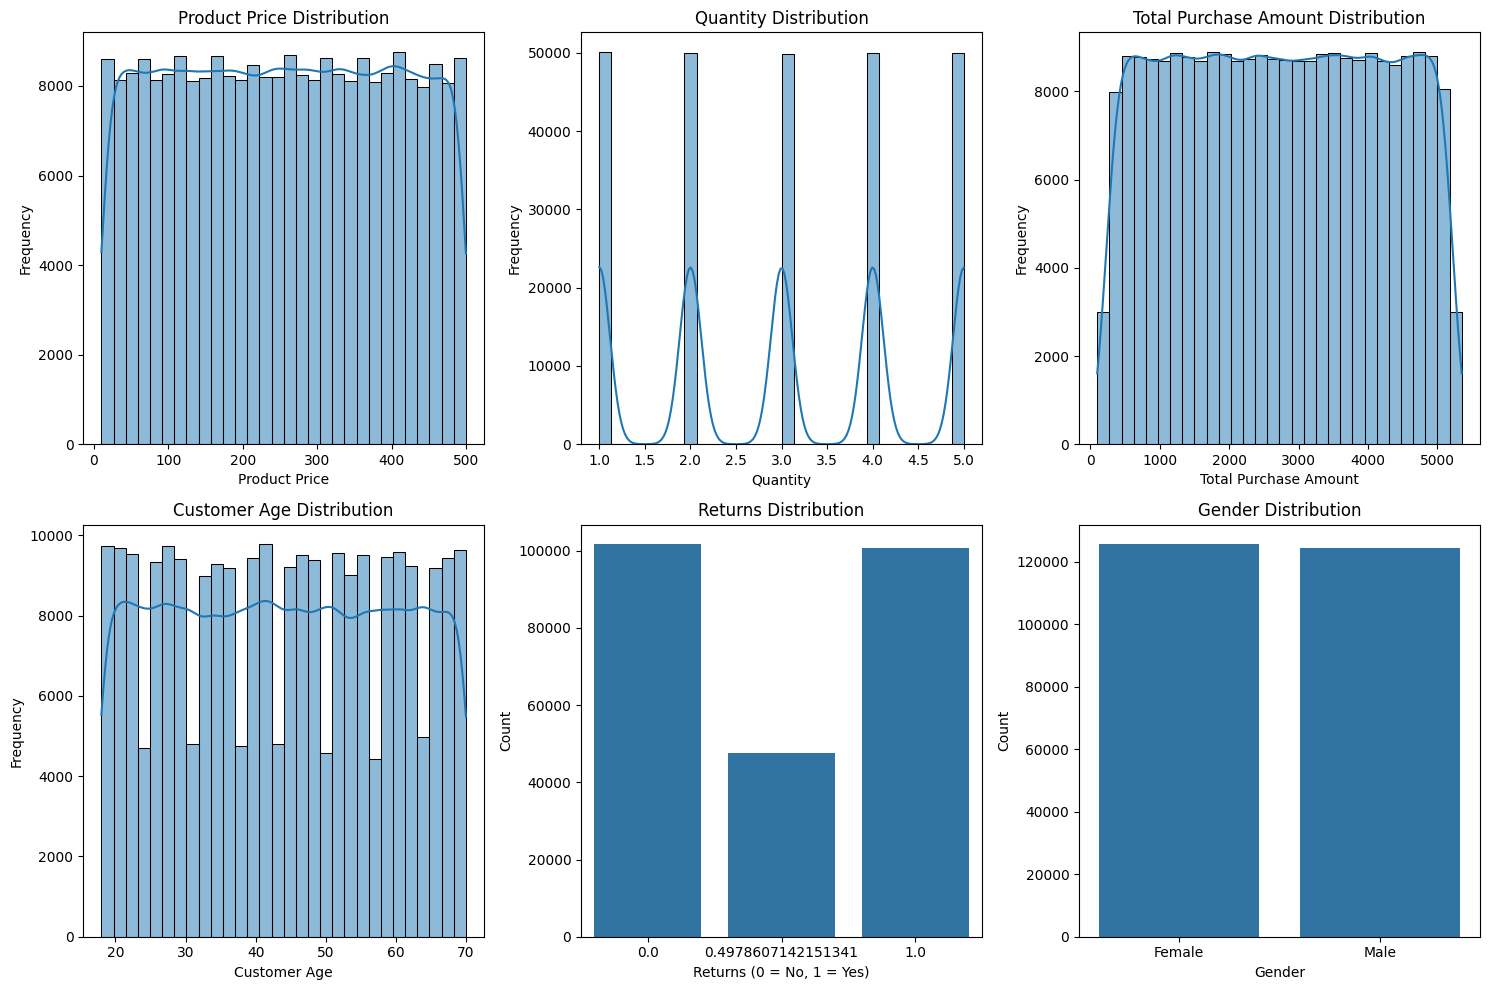

In [9]:
#visualize the distributions across different attributes
plt.figure(figsize=(15, 10))

# Product Price
plt.subplot(2, 3, 1)
sns.histplot(data['Product Price'], bins=30, kde=True)
plt.title('Product Price Distribution')
plt.xlabel('Product Price')
plt.ylabel('Frequency')

# Quantity
plt.subplot(2, 3, 2)
sns.histplot(data['Quantity'], bins=30, kde=True)
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

# Total Purchase Amount
plt.subplot(2, 3, 3)
sns.histplot(data['Total Purchase Amount'], bins=30, kde=True)
plt.title('Total Purchase Amount Distribution')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Frequency')

#Customer Age
plt.subplot(2, 3, 4)
sns.histplot(data['Customer Age'], bins=30, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')

# Returns
plt.subplot(2, 3, 5)
sns.countplot(x='Returns', data=data)
plt.title('Returns Distribution')
plt.xlabel('Returns (0 = No, 1 = Yes)')
plt.ylabel('Count')

#Gender
plt.subplot(2, 3, 6)
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

categorical_attributes = ['Product Category', 'Gender']

In [10]:
#normalize numeric variables using Min-Max scaling to the numerical attributes
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[numerical_attributes] = scaler.fit_transform(data[numerical_attributes])

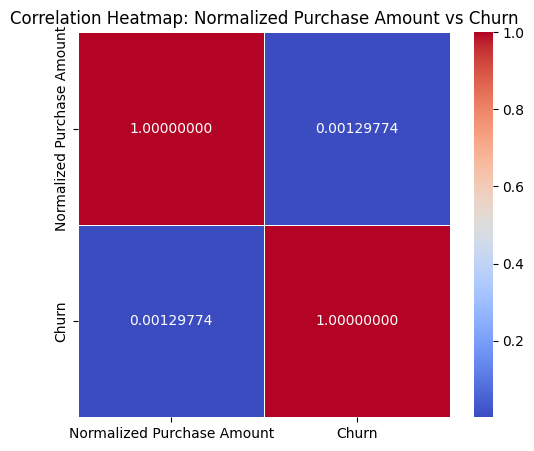

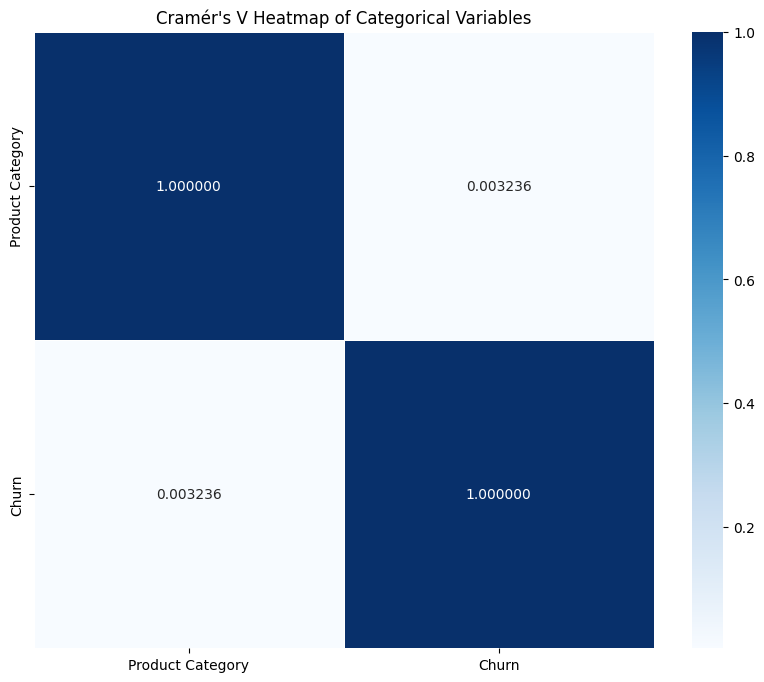

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the Pearson correlation matrix for Normalized Purchase Amount and Churn
correlation_matrix = data[['Normalized Purchase Amount', 'Churn']].corr()

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".8f", linewidths=0.5)
plt.title("Correlation Heatmap: Normalized Purchase Amount vs Churn")
plt.show()
#use chi square correlation matrix/heatmap for categorical attributes

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Function to compute Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

# List of categorical columns you want to calculate correlations for
categorical_columns = ['Product Category', 'Churn']

# Create an empty dataframe to store Cramér's V values
cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))),
                                index=categorical_columns, columns=categorical_columns)

# Calculate Cramér's V between each pair of categorical columns
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0  # Same column correlation is 1
        else:
            confusion_matrix = pd.crosstab(data[col1], data[col2])
            cramers_v_matrix.loc[col1, col2] = cramers_v(confusion_matrix)

# Plot a heatmap of Cramér's V correlations
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap="Blues", fmt=".6f", linewidths=0.5)
plt.title("Cramér's V Heatmap of Categorical Variables")
plt.show()

In [12]:
# #plot the heatmap for numerical correlations
# plt.figure(figsize=(10, 8))
# sns.heatmap(numerical_corr, annot=True, fmt=".6f", cmap='coolwarm', center=0,
#             vmin=-0.1, vmax=0.1, cbar_kws={"shrink": .8})  # Use a soft blue color map
# plt.title('Heatmap of Relationships Between Numerical Attributes')
# plt.show()


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate mode and counts of 0 and 1 for churn
mode_churn = data['Churn'].mode()[0]  # Get the first mode for churn
counts_churn = data['Churn'].value_counts()

print("\nMode for Churn:", mode_churn)
print("\nCounts for Churn (0 and 1):\n", counts_churn)





Mode for Churn: 0

Counts for Churn (0 and 1):
 Churn
0    200126
1     49874
Name: count, dtype: int64


**Normalization of Numeric Variables**

Split the dataset

In [14]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42, shuffle=False)  # Keeps sequential order

print(f"Training Set Size: {len(train_data)}")
print(f"Test Set Size: {len(test_data)}")

Training Set Size: 175000
Test Set Size: 75000


## **Model Building**

In [15]:
!pip install hmmlearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 3.5 MB/s eta 0:00:00


In [58]:
from hmmlearn import hmm

# Create a unique representation of hidden states by combining the relevant attributes

data['Hidden State'] = list(zip(data['Normalized Purchase Amount']))

# Convert the 'Hidden State' tuples to unique numeric codes for HMM processing
data['Hidden State Code'] = data['Hidden State'].astype('category').cat.codes

# Define hidden states and observed states
hidden_states = data['Hidden State Code'].values.reshape(-1, 1)  # Reshape for HMM
observed_states = data['Churn'].values  # Churn is your observed state

# Initial State Probabilities
initial_state_counts = data['Hidden State Code'].value_counts(normalize=True)
initial_state_probabilities = initial_state_counts.values
print("Initial State Probabilities:", initial_state_probabilities)

# Number of unique hidden states based on all relevant attributes
n_states = len(data['Hidden State Code'].unique())
print(f"Number of Unique Hidden States: {n_states}")

# Transition Counts
transition_counts = np.zeros((n_states, n_states))

# Calculate transition counts based on hidden states
for i in range(len(hidden_states) - 1):
    transition_counts[hidden_states[i], hidden_states[i + 1]] += 1

# Normalize to get transition probabilities
transition_probabilities = (transition_counts.T / transition_counts.sum(axis=1)).T
transition_probabilities = np.nan_to_num(transition_probabilities)  # Handle any NaNs
print("\nTransition Probabilities:\n", transition_probabilities)

# Emission Probabilities
n_observed_states = len(np.unique(observed_states))
emission_counts = np.zeros((n_states, n_observed_states))

for i in range(len(hidden_states)):
    emission_counts[hidden_states[i], observed_states[i]] += 1

# Normalize to get emission probabilities
emission_probabilities = (emission_counts.T / emission_counts.sum(axis=1)).T
emission_probabilities = np.nan_to_num(emission_probabilities)  # Handle any NaNs
print("\nEmission Probabilities:\n", emission_probabilities)

# Create the HMM model with the desired number of hidden states
n_components = n_states  # Adjust the number of hidden states
model = hmm.MultinomialHMM(n_components=n_components, n_iter=100)  # Use MultinomialHMM for categorical data

# Drop rows with NaN values to avoid fitting errors
data.dropna(subset=['Hidden State Code', 'Churn'], inplace=True)

# Fit the model on hidden states
model.fit(hidden_states)

# Predict hidden states based on the fitted model
hidden_state_predictions = model.predict(hidden_states)


Initial State Probabilities: [0.250104 0.250044 0.25004  0.249812]
Number of Unique Hidden States: 4

Transition Probabilities:
 [[0.24949621 0.24775293 0.25050379 0.25224707]
 [0.25133579 0.24844025 0.25167173 0.24855223]
 [0.25071189 0.25213566 0.25015198 0.24700048]
 [0.24887515 0.25183738 0.24783437 0.25145309]]


https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340



Emission Probabilities:
 [[0.80107475 0.19892525]
 [0.80024316 0.19975684]
 [0.80163174 0.19836826]
 [0.7990649  0.2009351 ]]


In [59]:
from hmmlearn import hmm
import numpy as np
from sklearn.model_selection import train_test_split

# Seed the randomness for reproducibility
np.random.seed(42)

# Assuming 'data' is your original dataset and it already has the categorized 'Normalized Purchase Amount'
# You've already categorized the 'Total Purchase Amount' into discrete categories based on quantiles

# Split the data (ensuring reproducibility)
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42, shuffle=False)

# Prepare training and test data
hidden_states_train = train_data['Normalized Purchase Amount'].values.reshape(-1, 1)
hidden_states_test = test_data['Normalized Purchase Amount'].values.reshape(-1, 1)

# Initialize HMM with fixed start parameters if needed
n_components = len(np.unique(hidden_states_train))  # Number of unique hidden states
model = hmm.MultinomialHMM(n_components=n_components, n_iter=100, tol=1e-4, random_state=42)

# Define custom start and transition probabilities to stabilize the model
model.startprob_ = np.ones(n_components) / n_components  # Uniform start probability
model.transmat_ = np.ones((n_components, n_components)) / n_components  # Uniform transition probability

# Fit the model with the training data
model.fit(hidden_states_train)

# Predict the hidden states on the test data
predicted_hidden_states = model.predict(hidden_states_test)

# Output the predicted hidden states
print("Predicted Hidden States:", predicted_hidden_states)


https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Predicted Hidden States: [1 2 2 ... 2 2 2]


In [60]:
# Map hidden states to churn (assuming 1 -> churn, 0 -> no churn)
# If state 1 is considered to correspond to churn (adjust as needed based on model output)
predicted_churn_values = (predicted_hidden_states == 1).astype(int)

# Actual churn values
actual_churn_values = test_data['Churn'].values

# Calculate accuracy
accuracy = accuracy_score(actual_churn_values, predicted_churn_values)

# Print the accuracy as a percentage
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 79.86%


## **Check for Most Probable Hidden State Sequence based on Observed States**

In [61]:
import numpy as np
from hmmlearn import hmm

# Define your test sequence of observations
observations_list = [0,0,0, 1,1,1]  # Example sequence of churn (0) and no churn (1)
observations_sequence = np.array(observations_list).reshape(-1, 1)

# Assuming you've already trained the model on hidden states
# Use the decode function to get the log probability and hidden states
log_probability, hidden_states = model.decode(observations_sequence, algorithm='viterbi')

# Convert log probability to actual probability
estimated_probability = np.exp(log_probability)

# Print the results
print("Sequence of Observations:", ' '.join(str(observations_list[i]) for i in range(len(observations_list))))
print("Most likely hidden states:", hidden_states)
print("Log Probability:", log_probability)
print("Estimated Probability of Churn based on Hidden States Sequence:", estimated_probability)


Sequence of Observations: 0 0 0 1 1 1
Most likely hidden states: [1 2 2 2 2 2]
Log Probability: -1.5156047223013656
Estimated Probability of Churn based on Hidden States Sequence: 0.21967530211898584


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250000 entries, 78366 to 132762
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Customer ID                 250000 non-null  int64         
 1   Purchase Date               250000 non-null  datetime64[ns]
 2   Product Category            250000 non-null  object        
 3   Product Price               250000 non-null  int64         
 4   Quantity                    250000 non-null  int64         
 5   Total Purchase Amount       250000 non-null  float64       
 6   Payment Method              250000 non-null  object        
 7   Customer Age                250000 non-null  float64       
 8   Returns                     250000 non-null  float64       
 9   Customer Name               250000 non-null  object        
 10  Age                         250000 non-null  int64         
 11  Gender                      250000 non-n

In [20]:
# Print unique values in the 'Returns' column
unique_returns_values = data['Returns'].unique()
print("Unique values in 'Returns' column:", unique_returns_values)


Unique values in 'Returns' column: [0.         1.         0.49786071]
